
**Name**: Bar Cohen

**Student ID**: 305608549

**Date**: 18.3.22

<hr>

##### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 1
#### Topics:
- The Linear Model
- Linear Least Squares
- Exploratory data analysis
- Normal, chisquared, t, and F distributions

#### Due: 03/22/2022 by 18:30

$\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}$

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>

<hr>
<hr>

## Problem 1 (Making a Model)
A project management team want to model the number of two types of users, called type $A$ and type $B$, over time. The model they want to use has the overall number of users growing linearly over time. At time $t=0$ (not necessarily the website launching date) the linear model should have expected number of users equal in the two groups. At time $t=100$, they introduce a new feature. They think this could change the slope at time $t=100$ but only for users of type $A$ (it changes the *slope*, hence would not put a jump discontinuity into the expected number of users).

1. Write a linear model that the team can use. Be sure to say what features $\{Z_{ij}\}$ go into the model.
2. Maybe the intervention did not do anything. Which parameter in your model would then be zero? (make sure you have such a parameter in your model). 

*The point*: as data scientistis/statistician, you have to turn the domain person's intuition into a model. They may not come to you talking about $x$s and $y$s and $\beta$ and $\epsilon$. Also, the model might be something they want to disprove. 

<hr> 
<hr>

To model the expirement we will use a two-phase regression, defined as:

$$
\mathbb E[Y|X=x] = \beta_0 + \beta_1x + \beta_2[x-t]_+ \\
Z_+ := 1_A\cdot\max{(0,z)} = 1_A\cdot z\cdot1_{z>0}
$$

where $1_A$ is an indicitaor feature of the type of the user, resulting in 1 if the user is of type A.

for our case, we will use $$t=100$$ 
Lets explain in words what do model does. Until time t=100 there is no effect for the value beta_0. However, past the t=100 point the model will start taking it into account in a linear fashion e.g at time t=101 the $ \beta_2 \cdot 1 $ will be added to the model. 

Indeed if the feature added to the website did not contribute to the model then the coffient $\beta_2 = 0$. And we will see the same slope as before time t=100.

## Problem 2 (Linerization trick in Sinusiodal Regression)
1. Consider the model:
$$
\mathbb E[Y|X=x] = \beta_0 + \beta_1 \sin\left(2\pi  (x - \beta_2) \right)
$$
with predictor $x$, response varaible $y$, and parameters $\beta_0$, $\beta_1$, and $\beta_2$. Is this model linear?
2. Consider instead the model:
$$
\mathbb E[Y|X=x] = \beta_0' + \beta_1' \sin\left(2\pi \cdot x\right) + \beta_2' \cos(2 \pi \cdot x),
$$
with predictor $x$, response varaible $y$, and parameters $\beta_0'$, $\beta_1'$, and $\beta_2'$. Is this model linear?
3. Show that the model from 1 can be written as the model in 2 in the sense that $(\beta_0', \beta_1', \beta_2')$ are a function of $(\beta_0, \beta_1', \beta_2')$. Find this function.

<hr> 
<hr>

1. A model is linear when it consists of a constant and parameters (Betas) multiplied by some random variable. In our case beta_1 is multiplied by beta_2, making the model non-linear. 

2. This second model is indeed linear, even though it consists of non-linear functions as the sigmoid and the cosin they only apply on the RV x, and not the coffeient beta. 

3.
first denote the desired coffeients betas to assist us:
$$
\mathbb \beta_2 = \sqrt{\beta_1' + \beta_2'}
$$ 

$$
\mathbb \beta_1 = \arcsin{\frac{\beta_2'}{\beta_1}} \leftrightarrow{} \sin{\beta_1} = \frac{\beta_2'}{\beta_2} \leftrightarrow \frac{\beta_2'}{\sqrt{\beta_1' + \beta_2'}}
$$ 

now using trigo identities,

$$
\mathbb \beta_0 + \beta_1\sin{2\pi(x - \beta_2)} = \beta_2 \cdot (\sin{2\pi x} \cdot \cos{\beta_2} 
+ \cos{2\pi x}\cdot\sin{\beta_2}
)
=
\sqrt{\beta_1' + \beta_2'}\cdot
(\frac{\beta_1'}{\sqrt{\beta_1' + \beta_2'}} \sin{2\pi x} + 
\frac{\beta_2'}{\sqrt{\beta_1' + \beta_2'}} \cos{2\pi x})
$$ 

$$
\mathbb =  \beta_1'\sin{2\pi x} + \beta_2'\cos{2\pi x}
$$

and by using $$ \beta_0 = \beta_0' $$ we get desired result.



## Problem 3 (EDA)
For this problem, you will need to go through the exploratory data analysis (EDA) notebook in the course page

1. Download the Red Wine Quality Dataset from UCI repository (the file winequality-red.csv at https://archive.ics.uci.edu/ml/datasets/Wine+Quality). 
2. Filter columns to cosnider only the five variables: $\texttt{density}$, $\texttt{alcohol}$, $\texttt{pH}$, $\texttt{volatile}$, $\texttt{acidity}$, and the target variable $\texttt{quality}$.
3. Evaluate mean, varaince, median, q1, q3, IQR, and absolute range of each variable.
4. Indicate whether there are outlayers, mark and remove those; explain your logic. 
5. Illustrate the covaraince matrix of all variable. Indicate variables most correlated with the target variable. 
6. Illustrate a "pairs plot", i.e. a matrix of scatterplots in which each cell involves two variables except the diagonal.

<hr>
<hr>

1+2+3 - reading,filtering and evaluating

In [1]:
# Your code here
import pandas as pd 

w_nvars = ['density', 'alcohol', "pH", "volatile acidity" ,"quality"]
df = pd.read_csv('winequality-red.csv', sep=';',usecols=w_nvars) # filter according to desired vars
IQR = lambda x: x.quantile(.75) - x.quantile(.25)
absrange = lambda x: x.max() - x.min()
desc = df.describe()
desc.append(pd.Series(df.apply(IQR), name='IQR'))
desc.append(pd.Series(df.apply(absrange), name='abs range'))


,volatile acidity,density,pH,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,0.996747,3.311113,10.422983,5.636023
std,0.179060,0.001887,0.154386,1.065668,0.807569
min,0.120000,0.990070,2.740000,8.400000,3.000000
25%,0.390000,0.995600,3.210000,9.500000,5.000000
50%,0.520000,0.996750,3.310000,10.200000,6.000000
75%,0.640000,0.997835,3.400000,11.100000,6.000000
max,1.580000,1.003690,4.010000,14.900000,8.000000
abs range,1.460000,0.013620,1.270000,6.500000,5.000000


4. Removing outliers

array([[<AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'alcohol'}>],
       [<AxesSubplot:title={'center':'quality'}>, <AxesSubplot:>]],
      dtype=object)

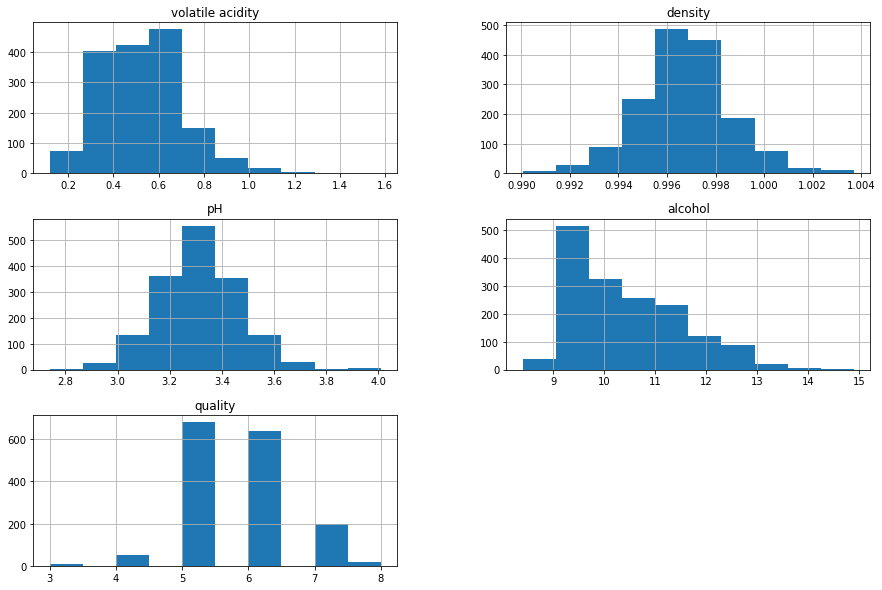

In [2]:
df.hist(figsize=(15,10))

Taking into account both the variable description values and the above histogram plot we could remove outliers in the data. Those would be values greater than 1.1 acidity, 3.7 pH, 13.5 alcohol and less then 4 quality. 

In [3]:
new_df = df[(df['pH'] <= 3.8) & (df['volatile acidity'] <= 1.1) & (df['alcohol'] <= 13.5) & (df['quality'] >= 4)]
total_removed = df.count()[0] - new_df.count()[0]
print(f"total outliers removed: {total_removed}")

total outliers removed: 34


4. Covarince Matrix between variables

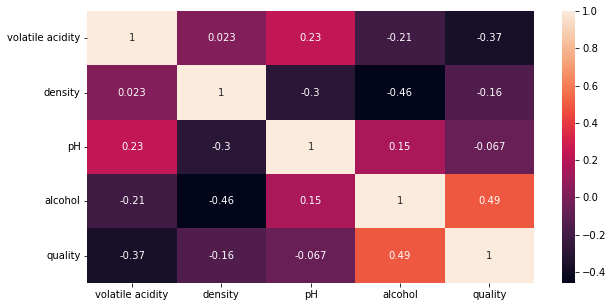

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
sns.heatmap(new_df.corr(),annot=True)
plt.show()

Note the hightest correlated variables to the quality target is the alcohol level - 0.49. Furthermore, the volatile acidity has a negative corrleation of -0.37 to the target. e.g. - the more acidic the wine, the lower the quality.

6. Pairs Plot

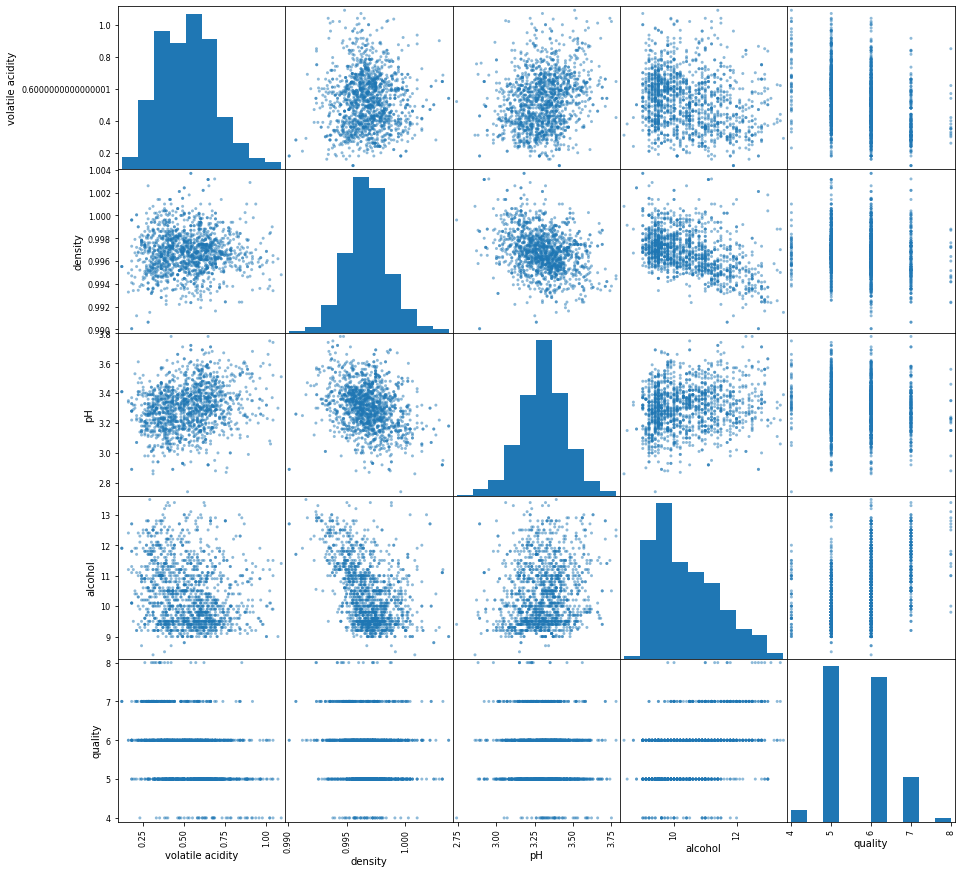

In [5]:
plt.rcParams['figure.figsize'] = [15, 15]
pd.plotting.scatter_matrix(new_df)
plt.show()

## Problem 4 (Least squares)

1. Consider the Red Wine Quality Dataset of the previous question. Fit a least squares model to ``quality`` based on the other variables and a constant term. Report on the vector of regression coefficients $\hat{\beta}$. Make sure to indicate which entry is associated with each predictor. 
3. Plot the response values $y$ and the fitted response $\hat{y} = Z^\top \hat{\beta}$
4. Illustrate the histogram of the residual vector $\hat{\epsilon}$; what is the average of this vector?
5. Write a code that verifies:
 - $H = H^\top$ 
 - $H^2 = H$
 - $(I-H)^2 = I-H$
 - $\hat{\epsilon}^\top y = 0$ 
 - $\lambda_i(H) \in \{0,1\}$, where $\lambda_i$ is the $i$-th eigenvalue of $H$
 - $\|y\|^2 = \|\hat{\epsilon}\|^2 + \|\hat{y}\|^2$
 - $SS_{Tot} = SS_{Fit} + SS_{Res}$, for the sum of squares decomposition 
 
<hr>
<hr>

1. Least squares model

In [6]:
# Your code here
import numpy as np
import statsmodels.api as sm
df = pd.read_csv('winequality-red.csv', sep=';') # filter according to desired vars

# using an OLS least squares model
print("Using OLS least squares model solver")
y = df['quality']
X = df.drop(['quality'], axis=1)
sm.add_constant(X)
ret = sm.OLS(y, X).fit()
ret.params

Using OLS least squares model solver


C:\Users\x3yusk\Anaconda3\envs\master\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


fixed acidity           0.004194
volatile acidity       -1.099743
citric acid            -0.184146
residual sugar          0.007071
chlorides              -1.911419
free sulfur dioxide     0.004548
total sulfur dioxide   -0.003319
density                 4.529146
pH                     -0.522898
sulphates               0.887076
alcohol                 0.297023
dtype: float64

In [7]:
# Closed linear solution beta's - for verfication:
print("\nUsing a closed linear solution")
Z = np.column_stack((np.ones_like(y) , X))
beta_hat = np.dot(np.linalg.inv(np.dot(Z.T, Z)), np.dot(Z.T, y))
print(f'\nbais beta is: {beta_hat[0]}')
for col, beta in zip(X.columns, beta_hat[1:]):
    print(f'Variable {col} beta is: {beta}')


Using a closed linear solution

bais beta is: 21.965208407389582
Variable fixed acidity beta is: 0.02499055263029959
Variable volatile acidity beta is: -1.0835902587470798
Variable citric acid beta is: -0.18256394842754275
Variable residual sugar beta is: 0.016331269746984844
Variable chlorides beta is: -1.8742251579766958
Variable free sulfur dioxide beta is: 0.004361333309456317
Variable total sulfur dioxide beta is: -0.0032645797031906065
Variable density beta is: -17.8811637875624
Variable pH beta is: -0.4136531440442468
Variable sulphates beta is: 0.9163344126635025
Variable alcohol beta is: 0.27619769926712934


Note that the coffeients by the two methods are very similar, with the only major difference in the density beta, which combined with the given bias arrives at the same density beta as the OLS least squares model

2. response values y_hat plot

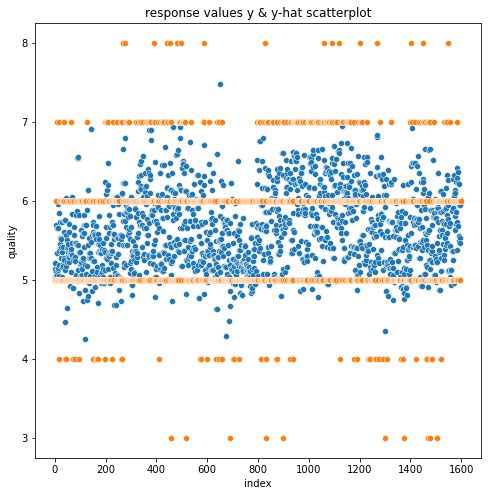

In [80]:
plt.rcParams['figure.figsize'] = [8, 8]
df_hat = df.copy()
# df_hat['y_hat'] = beta_hat[0] + beta_hat[1] * df['volatile acidity'] + beta_hat[2] * df['density'] + beta_hat[3] * df['pH'] + beta_hat[4] * df['alcohol']
# df_hat['y_hat'] = X @ ret.params.values # XBeta
df_hat['y_hat'] = Z @ beta_hat # XBeta
sns.scatterplot(data=df_hat,x=df_hat.index, y='y_hat')
sns.scatterplot(data=df_hat,x=df_hat.index, y='quality')

# df_hat['y_hat'].plot()
# df_hat['quality'].plot()
plt.title('response values y & y-hat scatterplot')
plt.xlabel('index')
plt.ylabel('quality')
plt.show()

residual vector e

Mean value for residual vectore is: 1.2841107461253544e-05


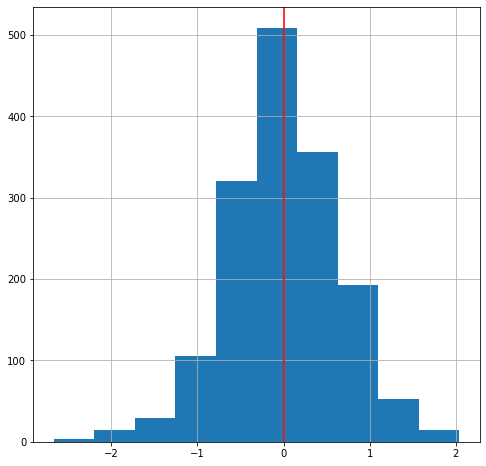

In [54]:
df_hat['residual'] = df['quality'] - df_hat['y_hat']  # y - ZBeta
df_hat['residual'].hist()
plt.axvline(x=df_hat['residual'].mean(), color='r', linestyle='-')
print('Mean value for residual vectore is:', df_hat['residual'].mean())

properties of H

In [10]:
# X = X.values
# Z = Z.values

In [11]:
# H = np.dot(np.dot(Z ,(np.linalg.inv(np.dot(Z.T , Z)))), Z.T)
# X = Z.values
H = Z @ (np.linalg.inv(Z.T @ Z)) @ Z.T
np.testing.assert_almost_equal(H, H.T)
np.testing.assert_almost_equal(np.power(H,2), H, decimal=1)
I_H = np.eye(H.shape[0]) - H 
np.testing.assert_almost_equal(np.power(I_H,2), I_H, decimal=1)

residual = df_hat['residual']
y = df['quality']

# np.testing.assert_almost_equal(residual.T @ y ,0)
eigens, _ = np.linalg.eig(H)
eigens[eigens > 0.01] -= 1 # if the eigen value is not 0, it must be 1. If if remove 1 of these all values should now equals 1
np.testing.assert_almost_equal(eigens, 0) 

y_hat = df_hat['y_hat']
y_norm = np.linalg.norm(y,2)
residual_norm = np.linalg.norm(residual,2)
y_hat_norm = np.linalg.norm(y_hat,2)
# np.testing.assert_almost_equal(y_norm, residual_norm + y_hat_norm) 

y_mean = y.mean()
ss_tot = np.sum((y - y_mean)**2)
ss_fit = np.sum((y_hat - y_mean)**2)
ss_res = np.sum((y - y_hat)**2)

np.testing.assert_almost_equal(ss_tot, ss_res + ss_fit - 1, decimal=0) 


$\newcommand{\var}{\mathrm{Var}}$
## Problem 5 (Weighted least squares)
In some cases we may want to weigh differently the controbution of each coordinate to the loss function. For example, this may be because not all meaasuremetns are equally reliable (e.g., new measurements may be more reliable than old ones). One way to account for this difference in reliability is by considering a *weighted* least squares problem, in which we seek $(\beta_1,\ldots,\beta_p) \in \reals^p$ to minimize 
$$
S(\beta_1,\ldots,\beta_p) := 
\sum_{i=1}^n w_i^2\left(y_i - \sum_{j=1}^p z_{ij} \beta_j \right)^2 = (\epsilon W)^\top (\epsilon W),
$$
where $W = \diag(w_1,\ldots,w_n)$, $w_i>0$ for all $i=1,\ldots,n$ are the weights associated with the reliability of each coordinate. 

1. Write the corresponding normal equations in a matrix form
2. Find the optimal vector of weights $\hat{\beta}$ minimizing $S(\beta_1,\ldots,\beta_p)$ in terms of $W$, $Z$, and $y$. 
3. What is the hat matrix? make sure that your expression reduces to the hat matrix from class when $W$ is the identity matrix. 

<hr>
<hr>

1. denote $W$ to be the diagonal matrix of weights such that $w_{i}$ is the weight of the i'th obervation.
Now we can write the normal equation for Weighted least squares as:
$$ (Z^TWZ)\hat{\beta}=Z^TWy $$ 

2. From the above defention we could isolate $\hat\beta$ as such

$$ \hat{\beta}=(Z^TWZ)^{-1}Z^TWy $$

3. The hat matrix is

$$  H = Z\hat\beta =  Z(Z^TWZ)^{-1}Z^TW $$

Recall the regular hat matrix we saw in class is:

$$  H = Z\hat\beta =  Z(Z^TZ)^{-1}Z^T $$

And indeed, if W is the identity matrix, then as any matrix multiplied by the identity matrix equals itself we are able to get $Z^T \cdot I = Z^T$. Thus, we remain with $Z^T$, hence reciving the above expression.




$\newcommand{\var}{\mathrm{Var}}$
## Problem 6 (Sampling from $\mathcal N(0,1)$, $\chi^2$, $t$, and $F$)
In the following excerise, you can only sample using repeated calls to ``random.random()``. 
You can use the ``scipy.stats`` package *only* to illustrate PDFs. You should illustrate histograms with the number of bins between 5%-10% of the number of samples $n=1,000$ in the input to the histogram. For example, use $100$ bins equally spaced between the range of the samples, so that you'll get a nice comparison between the empirical distribution and the theoretic distribution represented by the PDF. Make sure that the histogram is normalized to approximate the density of the simulated random variable. Set the seed ``random.seed(my_id)`` where ``my_id`` is your ID number with leading zeros removed. 

1. Implement the functions ``sample_unif``, ``sample_normal_clt``, and ``sample_normal``. Illustrate the histogram of $1000$ samples from ``sample_normal_clt`` and $1000$ samples from ``sample_normal``. Choose the input to ``sample_normal_clt`` so that the two histogram look alike. 
2. Implement the functions ``sample_chisq``, ``sample_t``, and ``sample_f``. You should use ``sample_normal`` repeatedly. 
3. Use ``sample_normal`` to sample $1000$ times from $\mathcal N(0,1)$ and use one figure to illustrate the histogram of the samples and the true PDF of $\mathcal N(0,1)$
4. Use ``sample_chisq`` to sample $1000$ times from $\chi^2_k$ and use one figure to illustrate the histogram of the samples and the true PDF of $\chi^2_k$; for $k=5$ and $k=10$.
5. Use ``sample_t`` to sample $1000$ times from $t_k$ (the $t$-distribution with $k$ degrees of freedom) and use one figure to illustrate the histogram of the samples and the true PDF of $t_k$; for $k=5$ and $k=10$.
6. Use ``sample_F`` to sample $1000$ times from $F_{k_1,k_2}$ and use one figure to illustrate the histogram of the samples and the true PDF of $F_{k_1,k_2}$; for $(k_1, k_2)= (10,5)$ and $(k_1, k_2)= (50,45)$.

In [95]:
import random
from scipy.stats import norm
import numpy as np

def sample_unif(n: int) -> float:
    """
    return n independent samples from the uniform distribution over (0,1)
    """
    return [random.uniform(0,1) for _ in range(n)]


def sample_normal_clt(n: int) -> float:
    """
    Approximately sample from the standard normal distribution using the CLT 
    
    Args:
    -----
    :n:    number of samples from a non-normal distribution
    
    Returns:
    -------
    
    :z:    random sample approximately from the standard normal distribution
    
    
    """
    return [random.gauss(0,1) for _ in range(n)]    
        
    # YOUR CODE HERE
    
    pass

def sample_normal(n:int) -> float:
    """
    Sample from the standard normal distribution using a single sample
    from the uniform distribution. You should use the normal quantile function
    ``norm.ppf``
    
    Args:
    -----
    :n:    number of samples from a non-normal distribution
    
    Return:
    -------
    :z:    random sample from the standard normal distribution
    
    """
    ret = []
    for i in range(n):
        uniform_sample = sample_unif(1)[0]
        ret.append(norm.ppf(uniform_sample, loc=0, scale=1))
    return ret



def sample_chisq(k: int) -> float:
    """
    Sample from the chisquared distribution with k degrees of freedom
    
    Args:
    -----
    :k:    number of degrees of freedom (DoF)
    
    Return:
    -------
    :x:    random sample from the chisquared distribution with k degrees of freedom
    
    """
    return np.sum(np.array(sample_normal(k)) ** 2)
#   chisq_pdf = ((1/2)**(k/2)) / math.gamma(k/2) * x ** (k/2-1) * np.e ** (-x/2)
    
    # YOUR CODE HERE
    pass


def sample_t(k: int) -> float:
    """
    Sample from the t distribution with k degrees of freedom
    
    Args:
    -----
    :k:    number of degrees of freedom
    
    Return:
    -------
    :x:    random sample from the t distribution
    
    """
    x = np.array(sample_normal(k))
#     sigma = ((1/k-1) * np.sum((x - x.mean())**2))
    bottom = 1 / np.sqrt(k)
    return x.mean()/ bottom

def sample_f(k1: int, k2:int) -> float:
    """
    Sample from the F distribution with k1 over k2 degrees of freedom
    
    Args:
    -----
    :k1:    number of degrees of freedom numerator
    :k2:    number of degrees of freedom denominator
    
    
    Return:
    -------
    :x:    random sample from the F distribution
    
    """
    x = (sample_chisq(k1) / k1) / (sample_chisq(k2) / k2)
    # YOUR CODE HERE
    return x

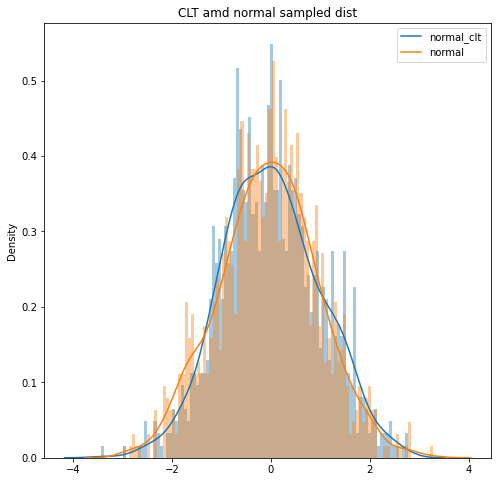

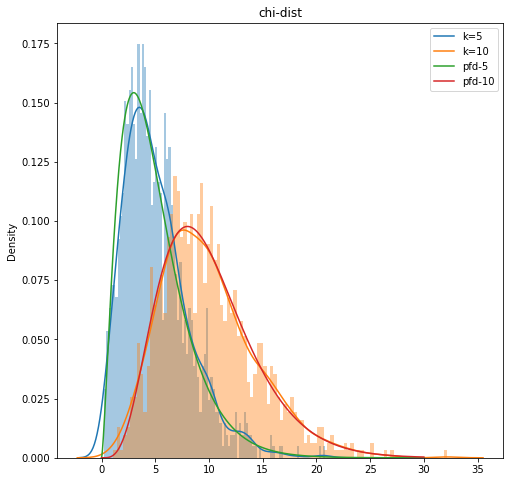

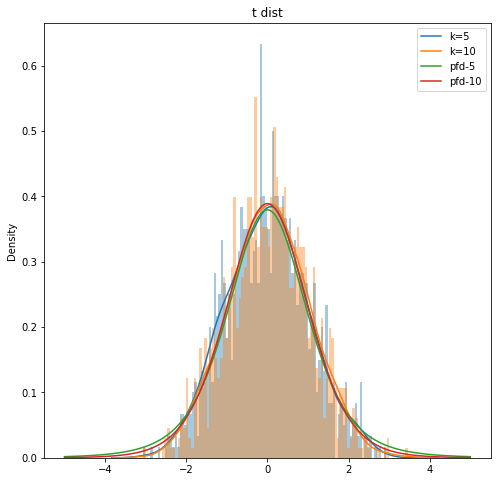

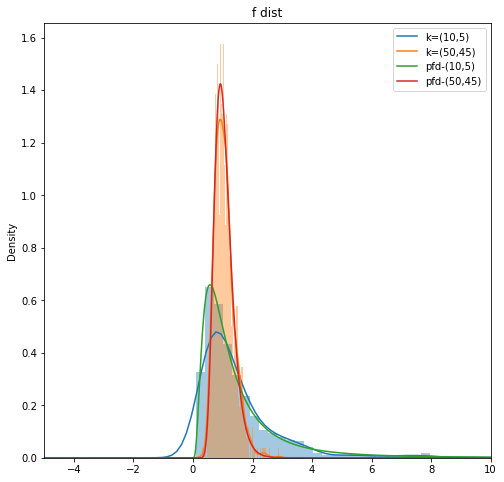

In [102]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import scipy
MY_ID = 305608549 # your personal ID number with leading zeros removed
random.seed(MY_ID)
sns.distplot(sample_normal_clt(1000), bins=100)
sns.distplot(sample_normal(1000), bins=100)
plt.legend(["normal_clt","normal"])
plt.title("CLT amd normal sampled dist")
plt.show()

xx = np.linspace(0, 30, 1000)
sns.distplot([sample_chisq(5) for _ in range(1000)], bins=100)
sns.distplot([sample_chisq(10) for _ in range(1000)], bins=100)
plt.plot(xx, scipy.stats.chi2.pdf(xx, 5))
plt.plot(xx, scipy.stats.chi2.pdf(xx, 10))
plt.title('chi-dist')
plt.legend(["k=5","k=10",'pfd-5','pfd-10'])
plt.show()


xx = np.linspace(-5, 5, 1000)
sns.distplot([sample_t(5) for _ in range(1000)], bins=100)
sns.distplot([sample_t(10) for _ in range(1000)], bins=100)
plt.plot(xx, scipy.stats.t.pdf(xx, 5))
plt.plot(xx, scipy.stats.t.pdf(xx, 10))
plt.legend(["k=5","k=10",'pfd-5','pfd-10'])
plt.title('t dist')
plt.show()


xx = np.linspace(-5, 10, 1000)
sns.distplot([sample_f(10,5) for _ in range(1000)], bins=100)
sns.distplot([sample_f(50,45) for _ in range(1000)], bins=100)
plt.plot(xx, scipy.stats.f.pdf(xx, 10,5))
plt.plot(xx, scipy.stats.f.pdf(xx, 50,45))
plt.xlim(-5,10)
plt.legend(["k=(10,5)","k=(50,45)",'pfd-(10,5)','pfd-(50,45)'])
plt.title('f dist')
plt.show()

<hr>
<hr>